In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas
import random

In [15]:
PU0_Private = open("myoutputfiles\DsTau3muPU0_Private.pkl", "rb")
PU200_MTD = open("myoutputfiles\DsTau3muPU200_MTD.pkl", "rb")
MinBias = open("myoutputfiles\MinBiasPU200_MTD.pkl", "rb")

In [16]:
tau_pu0file = pickle.load(PU0_Private)
tau_pu200file = pickle.load(PU200_MTD)
minbias_pu200file = pickle.load(MinBias)

In [17]:
taugunvars = tau_pu0file.keys()
minbiasvars = minbias_pu200file.keys()

In [18]:
tau_pu0 = np.array(tau_pu0file)
tau_pu200 = np.array(tau_pu200file)
minbias_pu200 = np.array(minbias_pu200file)

In [27]:
## Functions

def displayVars(dataset, eventnum, variables):
    test = dataset[eventnum]
    
    print("Event Number: {0}".format(eventnum), "\n")
    for i in range(len(test)):
        print("{0}: {1}".format(variables[i], test[i]))
    
    return

def tauChars(dataset):
    indices = [8,9,10,11,12]
    
    pt, eta, phi, energy, charge = (np.array([]) for i in range(5))
    
    for i in range(len(dataset)):
        pt = np.concatenate((pt, dataset[i][8]))
    
    for i in range(len(dataset)):
        eta = np.concatenate((eta, dataset[i][9]))
    
    for i in range(len(dataset)):
        phi = np.concatenate((phi, dataset[i][10]))
    
    for i in range(len(dataset)):
        energy = np.concatenate((energy, dataset[i][11]))
    
    for i in range(len(dataset)):
        charge = np.concatenate((charge, dataset[i][12]))

    return pt, eta, phi, energy, charge

def collectChar(index, dataset):
    char = []
    
    for i in range(len(dataset)):
        char.append(dataset[i][index])
    
    
    return char

def plotHits(dataset):
    hits, avg = avgHits(dataset)
    plt.hist(hits, bins=30)
    plt.xlabel("Number of Hits")
    plt.ylabel("Frequency")
    plt.savefig("Distribution of Hits.png")
    
    return

def filterPU200(dataset):
    singledOut = []
    
    for event in dataset:
        if event[0] == 1 and event[2] >= 3:
            singledOut.append(event)
    
    return singledOut

from tqdm import tqdm


# Plot a specified characteristic across all muons in the dataset
def plotCharPerHit(index, dataset, variables):
    char = collectChar(index, dataset)
    pool = []
    subpool = []
    
    for event in tqdm(char, total=len(char)):
        for hit in event:
            pool.append(hit)

    pool = np.array(pool)
    plt.hist(pool, bins='sqrt', histtype='step')
    plt.xlabel("{0}".format(variables[index]))
    plt.ylabel("Number of Muons")
    plt.title("Distribution of {0}".format(variables[index]))

# Plot a stacked histogram of a specific characterstic across all muons in the two datasets
# Change bin-size and labels as you see fit
def compCharPerHit(index, dataset1, dataset2, variables):
    char1 = collectChar(index, dataset1)
    char2 = collectChar(index,dataset2)
    pool1 = []
    pool2 = []
    
    for event in tqdm(char1, total=len(char1)):
        for hit in list(event):
            pool1.append(hit)
    
    for event in tqdm(char2, total=len(char2)):
        for hit in list(event):
            pool2.append(hit)

    pool1 = np.array(pool1)
    pool2 = np.array(pool2)
    plt.hist(pool2, bins=int(.1*len(pool2)**.5), histtype='step', label="tau_pu200", density=True, stacked=True)
    plt.hist(pool1, bins=int(.1*len(pool1)**.5), histtype='step', label="tau_pu0", density=True, stacked=True)
    plt.legend()
    plt.xlabel("{0}".format(variables[index]))
    plt.ylabel("Frequency")
    plt.title("Distribution of {0}".format(variables[index]))

# Plots and saves the generated kinematic properties of the lead-pt, second-pt, and softest-pt muons in each even
# Change bin-size and labels as you see fit
def plotMuonKinematics(dataset1, dataset2):
    pu0_lead_muon_pt = []
    pu0_lead_muon_eta = []
    pu0_lead_muon_phi = []
    pu0_second_muon_pt = []
    pu0_second_muon_eta = []
    pu0_second_muon_phi = []
    pu0_soft_muon_pt = []
    pu0_soft_muon_eta = []
    pu0_soft_muon_phi = []
    
    pu200_lead_muon_pt = []
    pu200_lead_muon_eta = []
    pu200_lead_muon_phi = []
    pu200_second_muon_pt = []
    pu200_second_muon_eta = []
    pu200_second_muon_phi = []
    pu200_soft_muon_pt = []
    pu200_soft_muon_eta = []
    pu200_soft_muon_phi = []
    
    for event in dataset1:
        
        for i in range(len(event[3])):
            
            if event[3][i] == max(event[3]):
                pu0_lead_muon_pt.append(event[3][i])
                pu0_lead_muon_eta.append(event[4][i])
                pu0_lead_muon_phi.append(event[5][i])
            elif event[3][i] == min(event[3]):
                pu0_soft_muon_pt.append(event[3][i])
                pu0_soft_muon_eta.append(event[4][i])
                pu0_soft_muon_phi.append(event[5][i])
            else:
                pu0_second_muon_pt.append(event[3][i])
                pu0_second_muon_eta.append(event[4][i])   
                pu0_second_muon_phi.append(event[5][i])

    for event in dataset2:
        
        for i in range(len(event[3])):
            
            if event[3][i] == max(event[3]):
                pu200_lead_muon_pt.append(event[3][i])
                pu200_lead_muon_eta.append(event[4][i])
                pu200_lead_muon_phi.append(event[5][i])
            elif event[3][i] == min(event[3]):
                pu200_soft_muon_pt.append(event[3][i])
                pu200_soft_muon_eta.append(event[4][i])
                pu200_soft_muon_phi.append(event[5][i])
            else:
                pu200_second_muon_pt.append(event[3][i])
                pu200_second_muon_eta.append(event[4][i]) 
                pu200_second_muon_phi.append(event[5][i])
    
    plt.hist(pu0_lead_muon_pt, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_lead_muon_pt, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Pt")
    plt.ylabel("Proportion")
    plt.title("Lead Muon Pt")
    plt.savefig("Lead_Muon_Pt.png")
    plt.clf()
    
    plt.hist(pu0_lead_muon_eta, bins='sqrt', histtype='step', label= "tau_pu0")
    plt.hist(pu200_lead_muon_eta, bins='sqrt', histtype='step', label= "tau_pu200")
    plt.legend()
    plt.xlabel("Eta")
    plt.ylabel("Proportion")
    plt.title("Lead Muon Eta")
    plt.savefig("Lead_Muon_Eta.png")
    plt.clf()
    
    plt.hist(pu0_lead_muon_phi, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_lead_muon_phi, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Phi")
    plt.ylabel("Proportion")
    plt.title("Lead Muon Phi")
    plt.savefig("Lead_Muon_Phi.png")
    plt.clf()
    
    plt.hist(pu0_second_muon_pt, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_second_muon_pt, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Pt")
    plt.ylabel("Proportion")
    plt.title("Second Muon Pt")
    plt.savefig("Second_Muon_Pt.png")
    plt.clf()    
    
    plt.hist(pu0_second_muon_eta, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_second_muon_eta, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Eta")
    plt.ylabel("Proportion")
    plt.title("Second Muon Eta")
    plt.savefig("Second_Muon_Eta.png")
    plt.clf()
    
    plt.hist(pu0_second_muon_phi, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_second_muon_phi, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Phi")
    plt.ylabel("Proportion")
    plt.title("Second Muon Phi")
    plt.savefig("Second_Muon_Phi.png")
    plt.clf()
    
    plt.hist(pu0_soft_muon_pt, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_soft_muon_pt, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Pt")
    plt.ylabel("Proportion")
    plt.title("Soft Muon Pt")
    plt.savefig("Soft_Muon_Pt.png")
    plt.clf()
    
    plt.hist(pu0_soft_muon_eta, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_soft_muon_eta, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Eta")
    plt.ylabel("Proportion")
    plt.title("Soft Muon Eta")
    plt.savefig("Soft_Muon_Eta.png")
    plt.clf()
    
    plt.hist(pu0_soft_muon_phi, bins='sqrt', histtype='step', label= "tau_pu0", density=True)
    plt.hist(pu200_soft_muon_phi, bins='sqrt', histtype='step', label= "tau_pu200", density=True)
    plt.legend()
    plt.xlabel("Phi")
    plt.ylabel("Proportion")
    plt.title("Soft Muon Phi")
    plt.savefig("Soft_Muon_Phi.png")
    plt.clf()



In [22]:
filtered_pu200 = filterPU200(tau_pu200)

100%|██████████| 77767/77767 [00:00<00:00, 222874.08it/s]


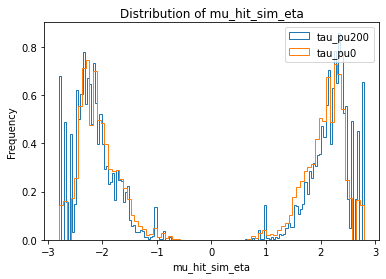

In [30]:
## Dataset Names
# Pileup 0: tau_pu0
# Pileup 200: tau_pu200
# Pileup 200, filtered for 1-tau events: filtered_pu200

## Variable Lists
# Tau gun variables: taugunvars
# MinBias variables: minbiasvars

## Example plotting: mu_hit_sim_eta for tau_pu0 and filtered_pu200
compCharPerHit(31, tau_pu0, filtered_pu200, taugunvars)

In [45]:
## Test code for calculating tau invariant mass

import math

class Muon:
    def __init__(self, pt, eta, phi):
        self.pt = pt
        self.eta = eta
        self.phi = phi
        # Invariant Mass
        self.m = .10563

def ijInvariantMassSq(Muoni, Muonj):
    mass = 2*(Muoni.m)**2 + 2*(Muoni.m**2 + ((Muoni.pt**2)*(math.cosh(Muoni.eta))**2))**(1/2)*(Muoni.m**2 + (Muonj.pt**2)*(math.cosh(Muonj.eta)**2))**(1/2)- 2*Muoni.pt*Muonj.pt*(math.sinh(Muoni.eta)*math.sinh(Muonj.eta)+math.cos(Muoni.phi - Muonj.phi))
    return mass

def tauInvariantMass(*args):
    mass = 0
    for i in range(len(args)):
        for j in range(i+1, len(args)):
            mass += ijInvariantMassSq(args[i], args[j])
            #print((i+1,j+1))
    mass = mass - 3*args[0].m**2
    
    return mass**(1/2)
